# Eliminación de artefactos impulsivos en una imagen

## Autor: Ronie Martínez Gordon

#### Trabajo presentado como actividad propuesta para la asignatura "Percepción Computacional"

## Objetivo

El objetivo de esta actividad es familiarizarse con el tratamiento del ruido de naturaleza impulsiva. Para ello, se pide que el alumno sea capaz de generar de forma artificial los artefactos de este tipo, así como de aplicar los filtros necesarios para su eliminación.

## Descripción

Se ha de **crear funciones o scripts en Python** basados en el uso de las librerías NumPy y skimage. Estas deben llevar a cabo diferentes operaciones que se describen a continuación. Para ellas, se tomará como entrada la imagen _Astronaut_, disponible en la librería skimage.

Tareas a realizar en la actividad:

- Crear una **función que modele la adición**, de forma aleatoria, de artefactos impulsivos. El resultado tendrá que apreciarse en la visualización de la imagen, que deberá estar afectada por ruido de tipo «sal y pimienta». Como se ha visto en la asignatura, estos artefactos toman valores de intensidad máximos o mínimos y afectan, aleatoriamente, a los píxeles de la imagen.
- La función a implementar debe aceptar la imagen original y devolver la imagen afectada por el ruido. Además, sería deseable que aceptara un argumento adicional para indicar el porcentaje de píxeles que se verán afectados por estos artefactos.
- A partir de la imagen ruidosa, buscaremos eliminar los artefactos impulsivos para el posterior tratamiento de la imagen. Para ello, se deberá aplicar un filtro adecuado para este tipo de ruido.
- Por último, a partir de la imagen obtenida en la etapa anterior, se busca identificar las siluetas de las estructuras en ella presentes. A este fin, se debe identificar y razonar qué tipo de operador corresponde aplicar.

## Desarrollo
### Importar las librerías necesarias

In [1]:
# librerias
import numpy as np
from skimage import data, io, filters
from skimage.color import rgb2gray
from skimage.morphology import disk

### Cargar la imagen propuesta para el procesamiento
Como se propone, utilizamos la imagen _astronaut_ disponible en _skimage.data.astronaut()_

Shape:  (512, 512)


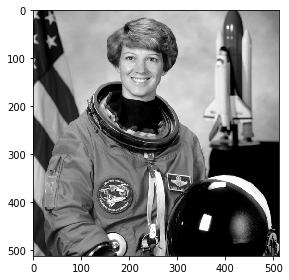

In [2]:
img = data.astronaut()
img_gs = rgb2gray(img)
io.imshow(img_gs);
print("Shape: ",img_gs.shape)

### Crear una función que modele la adición, de forma aleatoria, de artefactos impulsivos. El resultado tendrá que apreciarse en la visualización de la imagen, que deberá estar afectada por ruido de tipo «sal y pimienta». Como se ha visto en la asignatura, estos artefactos toman valores de intensidad máximos o mínimos y afectan, aleatoriamente, a los píxeles de la imagen. La función a implementar debe aceptar la imagen original y devolver la imagen afectada por el ruido. Además, sería deseable que aceptara un argumento adicional para indicar el porcentaje de píxeles que se verán afectados por estos artefactos.

In [3]:
# Función para añadir artificialmente ruido tipo s&p
def salt_pepper_noise(image, percentage = 5):
    # image: imagen a ser tratada
    # percentage: porcentaje de ruido, 5% por defecto
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.random.random() < percentage/100:
                if np.random.randint(0,2):
                    # pepper
                    image[i][j] = np.min(image)
                else:
                    # salt
                    image[i][j] = np.max(image)
    return image

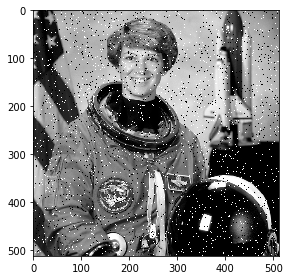

In [4]:
# Creamos una copia para no afectar la imagen original
img_c = img_gs.copy()
# Utilizamos la función para añadir ruido s&p
img_spn = salt_pepper_noise(img_c, 5) # 5% ruido
io.imshow(img_spn);

### A partir de la imagen ruidosa, buscaremos eliminar los artefactos impulsivos para el posterior tratamiento de la imagen. Para ello, se deberá aplicar un filtro adecuado para este tipo de ruido.

Basándonos en la teoría vista en clases, el filtro de la mediana sirve muy bien para mitigar errores del tipo impulsivo.

Este filtro es un procedimiento no supervisado que **no** crea nuevos valores, sino que selecciona uno de los valores (la mediana) dentro de la ventana utilizada. Utilizado para "corregir" anomalías/ruido de tipo impulsivo (_salt&pepper noise_).

https://scikit-image.org/docs/dev/api/skimage.filters.html

C:\Users\rsmartinez\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


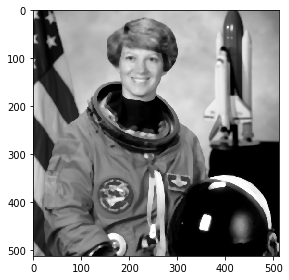

In [5]:
# Filtro de mediana con ventana tipo disco de tamaño 3
img_mf = filters.median(img_spn, disk(3))
io.imshow(img_mf);

### Por último, a partir de la imagen obtenida en la etapa anterior, se busca identificar las siluetas de las estructuras en ella presentes. A este fin, se debe identificar y razonar qué tipo de operador corresponde aplicar.

En la materia estudiada se han operadores de Sobel, Prewitt, entre otros. En la librería _skimage.filters_ se encuentran estos y otros filtros implementados, simplemente debemos enviar la imagen deseada como parámetro, y dependiendo del tipo de filtro otros parámetros necesarios, que se pueden consultar en la documentación:

https://scikit-image.org/docs/dev/api/skimage.filters.html

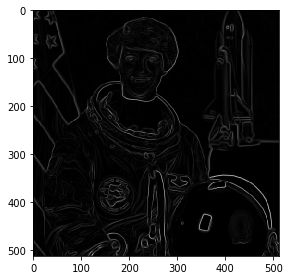

In [6]:
# Filtro Sobel
img_sf = filters.sobel(img_mf)
io.imshow(img_sf);

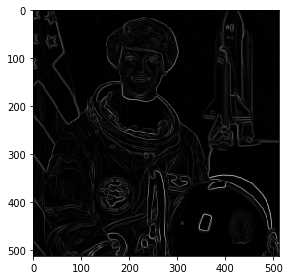

In [7]:
# Filtro Prewitt
img_pf = filters.prewitt(img_mf)
io.imshow(img_pf);

### Conclusiones

Se creó una función para adicionar artificialmente ruido de tipo sal y pimienta, la cual recibe como parámetros la imagen y el porcentaje de afectación de la misma debido al ruido. Se la realizó por medio de dos _for_ anidados que recorren la imagen píxel a píxel, y dependiendo de la probabilidad (y su comparación con el porcentaje ingresado) se cambia el valor del pixel con valor máximo (sal) o mínimo (pimienta).

Se utilizó el filtro de la mediana, disponible en la librería _skimage_, para mitigar los efectos del ruido de tipo impulsivo (sal y pimienta). Desde luego, se nota también una ligera afectación en cuanto la "calidad" de la imagen (si la comparamos con la original), generando un efecto de difuminación de la misma, el cual va a ser más notorio mientras mayor sea el porcentaje del ruido o se modifique el tamaño de la ventana. El filtro puede aceptar como parámetro el tipo de ventana y el tamaño para aplicarla, entre otros disponibles en la documentación).

Para la sección de detección de bordes, se utilizaron los filtros de Sobel y Prewitt, disponibles en la librería _skimage_, los cuales tienen un comportamiento y resultado similar. En la documentación se menciona que ambos filtros utilizan la raíz cuadrada de la suma de las transformadas horizontal y vertical al cuadrado. Además, la aproximación del operador gradiente del operador de Prewitt no es completamente invariante en rotación, y que el operador Sobel tiene un mejor desempeño (el operador Scharr tiene aún mejor desempeño que el operador Sobel), sin embargo, para este ejemplo, no se notó mayor diferencia entre los mencionados.